# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Зачётные задачи для пересдающих.
### Дедлайн --- 12го Февраля

Это задание необходимо решить и устно ответить. Для получения положительной оценки необходимо набрать 70% баллов. Будьте готовы вспомнить простую теорию к задачам, определения и формулировки теорем. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в чате курса https://t.me/+IHdLycZDD5g5MDQy.

Информация о способе сдачи домашнего задания будет позже.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [ ]:
# Matplotlib needed to correctly display suptitles,
# as well as some other minor things.
# I thought I might as well ensure everything is up to date
%pip install --upgrade matplotlib numpy scipy statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida

In [ ]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

In [ ]:
np.random.seed(42)

**Условие задания**: После полугода лишений и страданий Великая Ордалия наконец добралась до врат Голготтерата и бросила вызов нечестивому консульту. Главное оружие в борьбе с чудовищами --- холодный точный рассчёт и идеальное планирование.

Вам, оставшимся выжившим после перехода через пустоши предстоит взять на себя роль тактиков Аспект-Императора, рассчитать все риски и придумать оптимальный план штурма.

Пусть Гнозис Вам благоволит и удачи!

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

## Задача 1. Статистики и оценки. (30 баллов)




**Как оценивается задача:** 10 баллов за нахождение и моделирование оценок информативными графиками, 10 баллов за подсчёт теоретических и эмпирических рисков и сравнение, 10 баллов за анализ состоятельности и асимптотической нормальности.

Для распределения Релэя https://en.wikipedia.org/wiki/Rayleigh_distribution с плотностью $p_{\sigma}(x) = \frac{x}{\sigma^2}exp(-\frac{x^2}{2\sigma^2}) I(x \geq 0)$ предложите следующие оценки параметра $\sigma$:

- Оценка методом моментов
- Оценка максимального правдоподобия
- Оценка медианой

Решение:

Будем считать $X_i$ неотрицательными для удобства записи (на практике это верно, в силу природы распределения)

Метод моментов:
Запишем первый момент: $E_\theta X_1 = \sigma \sqrt{\frac{\pi}{2}}$

То оценка методом моментов дает $\hat{\sigma} = \sqrt{\frac{2}{\pi}} \overline{X} $

Максимальное правдоподобие: Запишем формулу оценки методом максимального правдоподобия: $\hat{\sigma} = argmax_{\theta \in \Theta} (\Sigma_{i=1}^{n} ln(\rho_\theta(X_i)))$

$ln(\rho_\theta(X_i)) = ln(\frac{X_i}{\theta^2}) - \frac{X_i^2}{2\theta^2}$

$ln(\rho_\theta(X_i))' = \frac{X_i^2 - 2\theta^2}{\theta^3}$

$(\Sigma_{i=1}^{n} ln(\rho_\theta(X_i)))' = \Sigma_{i=1}^{n}\frac{X_i^2 - 2\theta^2}{\theta^3} = \frac{n(\overline{X^2} - 2\theta^2)}{\theta^3}$

Равно нулю, то есть правдоподобие достигает максимума при $\theta = \sqrt{\frac{\overline{X^2}}{2}}$, то есть $\hat{\sigma} = \sqrt{\frac{\overline{X^2}}{2}}$

Медианой: Запишем формулу медианы: $\mu = \sigma \sqrt{2ln(2)}$

То оценка дает $\hat{\sigma} = \frac{\hat\mu}{\sqrt{2ln(2)}}$

План:

1. Построить функции вычисляющие оценки
2. Смоделировать эксперимент для N = 1000
3. Применить функцию для оценки параметра
4. Построить графики для каждого из методов

Код:

In [ ]:
import math
import random

In [ ]:
def sigma_mm_estimation(values):
  return math.sqrt(2/math.pi)*np.average(values, axis=1) # within each sample

def sigma_ml_estimation(values):
  return np.sqrt(np.average(np.square(values), axis=1)/2) # within each sample

def sigma_m_estimation(values):
  return math.sqrt(1/(2 * math.log(2)))*np.median(values, axis=1) # within each sample

In [ ]:
N = 1000
sigma_true = (1 / random.random()) - 1
rayleigh_values = np.array([np.random.rayleigh(scale=sigma_true, size=N) for i in range(N)])

In [ ]:
sigma_mm = sigma_mm_estimation(rayleigh_values)
sigma_ml = sigma_ml_estimation(rayleigh_values)
sigma_m = sigma_m_estimation(rayleigh_values)

Графики:

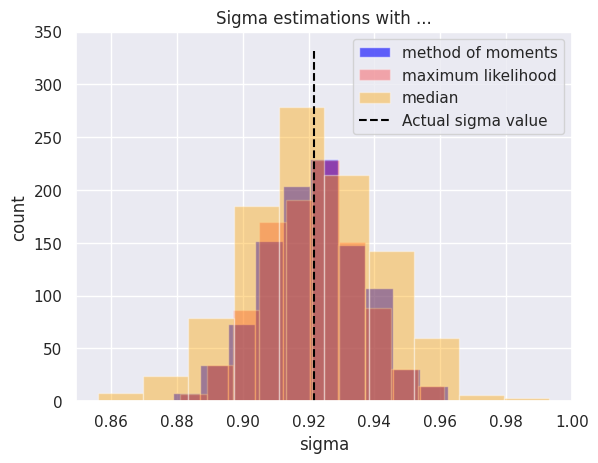

In [ ]:
plt.hist(sigma_mm, label='method of moments', color='blue', alpha=0.6)
plt.hist(sigma_ml, label='maximum likelihood', color='red', alpha=0.3)
plt.hist(sigma_m, label='median', color='orange', alpha=0.4)
plt.title('Sigma estimations with ...')
plt.plot([sigma_true, sigma_true], [0, N/3], color='black', linestyle='dashed', label='Actual sigma value')
plt.xlabel('sigma')
plt.ylabel('count')
plt.legend()
plt.show()

Вывод:

Оценки методом моментов и методом максимального правдоподобия близки по качеству, с незначительным превосходством максимального правдоподобия - оно дает чуть более кучное распределение оценок. Оценка медианой несколько хуже, что логично, поскольку она более эффективна на малых выборках, чем на больших. Тем не менее все оценки достаточно близки к целевому значению.

Решение:

Запишите формулу риска каждой оценки в виде интеграла и вычислите его аналитически или численно при помощи scipy.integrate.quad для размера выборки равного 10.

Будем использовать квадратичную функцию потерь $MSE(\hat{\sigma}) = E_\sigma ((\hat{\sigma} - \sigma)^2)$

Для $\hat{\sigma} = \sqrt{\frac{2}{\pi}} \overline{X} $

Заранее посчитаем второй момент - $E_\sigma(X_1^2) = D_\sigma(X_1) + (E_\sigma(X))^2 = \frac{4 - \pi}{2}\sigma^2 + \frac{\pi}{2}\sigma^2 = 2\sigma^2$

$E_\sigma ((\hat{\sigma} - \sigma)^2) = \int_{\mathbb{R}_+^n}(\hat{\sigma} - \sigma)^2dP_\sigma(x) = \int_{\mathbb{R}_+^n}(\sqrt{\frac{2}{\pi}} \overline{X} - \sigma)^2dP_\sigma(x) = \frac{2}{\pi}\int_{\mathbb{R}_+^n}\overline{X}^2dP_\sigma(x) - 2\sqrt{\frac{2}{\pi}}\int_{\mathbb{R}_+^n}\sigma\overline{X}dP_\sigma(x) + \int_{\mathbb{R}_+^n}\sigma^2dP_\sigma(x) = \frac{2}{\pi}E_\sigma(\overline{X}^2) - 2\sqrt{\frac{2}{\pi}}\sigma E_\sigma(\overline{X}) + \sigma^2 = \frac{2}{\pi}E_\sigma(X_1^2) - 2\sqrt{\frac{2}{\pi}}\sigma E_\sigma(X_1) + \sigma^2 = \frac{4\sigma^2}{n\pi} + \frac{(n - 1)\sigma^2}{n} - 2\sigma^2 + \sigma^2 = \frac{(4 - \pi)\sigma^2}{n\pi}$

In [ ]:
N = 10
sigma_true = (1 / random.random())**2 - 1

In [ ]:
sigma_true = 2 # for testing

In [ ]:
print(((4 - math.pi) * (sigma_true ** 2)) / (N * math.pi))

0.10929581789406509


Для $\hat{\sigma} = \sqrt{\frac{\overline{X^2}}{2}}$

Заранее посчитаем $E_\sigma(\overline{X^2})$ и $E_\sigma(\sqrt{\overline{X^2}})$

Докажем $E_\sigma(\overline{X^2}) = 2\sigma^2$

Для этого просто покажем по индукции, что $Y = \Sigma_{i=1}^nX_i^2 \sim Gamma(\alpha, \beta)$ для $\alpha = n$ и $\beta = \frac{1}{2\sigma^2}$

База:

Считаем pdf

$n = 1$

$g: Y = g(X)$

По теореме о замене переменной в интеграле Лебега

$\rho_Y(y) = \rho_X(g^{-1}(x))(g^{-1})' = \frac{\sqrt{y}}{\sigma^2}e^{-\frac{y}{2\sigma^2}}\frac{1}{2\sqrt{y}} = \frac{1}{2\sigma^2}e^{-\frac{y}{2\sigma^2}}$

Получаем требуемое

Переход:

По формуле свертки для независимых с.в.

$\rho_{Y + X_{n+1}^2}(x) = \int_0^x\rho_{X_{n+1}^2}(x - t)\rho_Y(t)dt = \int_0^x\frac{1}{2\sigma^2}e^{-\frac{x - t}{2\sigma^2}}\frac{(\frac{1}{2\sigma^2})^n}{n!}t^{n-1}e^{-\frac{t}{2\sigma^2}}dt = \frac{(\frac{1}{2\sigma^2})^{n+1}}{n!}e^{-\frac{x}{2\sigma^2}}\int_0^xt^{n-1}dt = \frac{(\frac{1}{2\sigma^2})^{n+1}}{n!}e^{-\frac{x}{2\sigma^2}}\frac{x^n}{n+1} = \frac{(\frac{1}{2\sigma^2})^{n+1}}{(n+1)!}x^ne^{-\frac{x}{2\sigma^2}}$

Получаем требуемое

Теперь

$E_\sigma\sqrt{\overline{X^2}} = \frac{1}{\sqrt{n}}E_\sigma\sqrt{Y} = \frac{1}{\sqrt{n}}\int_\mathbb{R_+}\sqrt{y}\rho_Y(y)dy = \frac{1}{\sqrt{n}}\int_\mathbb{R_+}\sqrt{y}\frac{(\frac{1}{2\sigma^2})^n}{n!}y^{n-1}e^{-\frac{y}{2\sigma^2}}dy$

Теперь

$E_\sigma ((\hat{\sigma} - \sigma)^2) = \int_{\mathbb{R}_+^n}(\hat{\sigma} - \sigma)^2dP_\sigma(x) = \int_{\mathbb{R}_+^n}\hat{\sigma}^2dP_\sigma(x) - 2\int_{\mathbb{R}_+^n}\hat{\sigma}\sigma dP_\sigma(x) + \int_{\mathbb{R}_+^n}\sigma^2dP_\sigma(x) = \frac{1}{2}\int_{\mathbb{R}_+^n}\overline{X^2}dP_\sigma(x) - \sqrt2\int_{\mathbb{R}_+^n}\sqrt{\overline{X^2}}\sigma dP_\sigma(x) + \int_{\mathbb{R}_+^n}\sigma^2dP_\sigma(x) = \frac{1}{2}E_\sigma(\overline{X^2}) - \sqrt2E_\sigma(\sqrt{\overline{X^2}}\sigma) + E_\sigma(\sigma^2) = \frac{1}{2}E_\sigma(\overline{X^2}) - \sigma\sqrt2E_\sigma(\sqrt{\overline{X^2}}) + \sigma^2 = 2\sigma^2 - \sigma\sqrt{\frac{2}{n}}\int_\mathbb{R_+}\sqrt{y}\frac{(\frac{1}{2\sigma^2})^n}{n!}y^{n-1}e^{-\frac{y}{2\sigma^2}}dy$

Отсюда посчитаем численно, поскольку аналитически взять этот интеграл у меня не вышло (и насколько мне известно он не берется)

План - тут достаточно просто переписать формулы в коде и запустить интеграл

Код:

In [ ]:
import math
import random
from scipy import integrate

In [ ]:
N = 10
sigma_true = (1 / random.random())**2 - 1

In [ ]:
sigma_true = 2 # for testing

In [ ]:
invexpr = lambda x: math.sqrt(x)*(((1/(2 * sigma_true * sigma_true)) ** N)/(math.factorial(N)))*(x ** (N - 1))*(math.e ** ((-x)/(2 * sigma_true * sigma_true)))

Таким образом получаем

In [ ]:
(sigma_true * math.sqrt(2/N) * integrate.quad(invexpr, 0, np.inf)[0])

0.7900663430609254

In [ ]:
print("for sigma ", sigma_true)
print("the risk is ",(2 * sigma_true * sigma_true) - (sigma_true * math.sqrt(2/N) * integrate.quad(invexpr, 0, np.inf)[0]))

for sigma  2
the risk is  7.209933656939075


Для $\hat{\sigma} = \frac{\hat\mu}{\sqrt{2ln(2)}}$

Заранее посчитаем $\rho_{\hat\mu}(x)$

Для этого используем формулу для pdf и совместных pdf порядковых статистик и, поскольку нам нужно будет численно посчитать медиану для четной выборки, отсюда считаем, что n - четно.

$A := X_{(n/2)}$

$B := X_{(n + 1/2)}$

$\rho_{\hat\mu}(x) = \rho_\frac{A + B}{2}(x) = 2\rho_{A + B}(2x)$, по формуле свертки

$\rho_{A + B}(x) = \int_0^x\rho_{AB}(t, x - t)dt$

А по формуле плотности $\rho_{AB}(t, x - t) = \frac{n!}{(\frac{n}{2} - 1)!^2}F(t)^{\frac{n}{2} - 1}(1 - F(x - t))^{\frac{n}{2} - 1}\rho(t)\rho(x-t)$

То для нашего распределения

$\rho_{\hat\mu}(x) = \int_0^{2x}\frac{n!}{(\frac{n}{2} - 1)!^2}(1 - e^{\frac{-t^2}{2\sigma^2}})^{\frac{n}{2} - 1}(e^{\frac{-(x - t)^2}{2\sigma^2}})^{\frac{n}{2} - 1}\frac{t(x - t)}{\sigma^4}e^{-\frac{t^2 + (x - t)^2}{2\sigma^2}}dt$

Теперь

$E_\sigma ((\hat{\sigma} - \sigma)^2) = \int_{\mathbb{R}_+^n}(\hat{\sigma} - \sigma)^2dP_\sigma(x) = \int_{\mathbb{R}_+^n}\hat{\sigma}^2dP_\sigma(x) - 2\int_{\mathbb{R}_+^n}\hat{\sigma}\sigma dP_\sigma(x) + \int_{\mathbb{R}_+^n}\sigma^2dP_\sigma(x) = \int_{\mathbb{R}_+^n}\frac{\hat\mu^2}{2ln(2)}dP_\sigma(x) - 2\int_{\mathbb{R}_+^n}\frac{\hat\mu}{\sqrt{2ln(2)}}\sigma dP_\sigma(x) + \int_{\mathbb{R}_+^n}\sigma^2dP_\sigma(x) = \frac{1}{2ln(2)}E_\sigma(\hat\mu^2) - \frac{2\sigma}{\sqrt{2ln(2)}}E_\sigma(\hat\mu) + \sigma^2 = \frac{1}{2ln(2)}\int_\mathbb{R_+}x^2\rho_{\hat\mu}(x)dx - \frac{2\sigma}{\sqrt{2ln(2)}}\int_\mathbb{R_+}x\rho_{\hat\mu}(x)dx + \sigma^2$

Отсюда можно переходить к численному вычислению

План - тоже переписываем формулы в код, оптимизируя при необходимости и запускаем

Код:

In [ ]:
N = 10
sigma_true = (1 / random.random())**2 - 1

In [ ]:
sigma_true = 2 # for testing

In [ ]:
fact_const = math.factorial(N) / (math.factorial((N//2) - 1) * math.factorial((N//2) - 1))
sigma_ds = 2 * sigma_true * sigma_true

In [ ]:
invexpr1 = lambda t, x: fact_const * ((1 - (math.e ** (- ( (t * t) / sigma_ds)))) ** ((N//2) - 1)) * ((math.e ** (- ( ((x - t) * (x - t)) / sigma_ds))) ** ((N//2) - 1)) * ((t * (x - t)) / (sigma_true ** 4)) * (math.e ** (- ((t * t) + ((x - t) * (x - t))) / sigma_ds))
rho = lambda x: integrate.quad(invexpr1, 0, x, args=(x,))[0]

In [ ]:
invexpr = lambda x: x * rho(x)
A = integrate.quad(invexpr, 0, np.inf)[0]

In [ ]:
invexpr = lambda x: x * x * rho(x)
B = integrate.quad(invexpr, 0, np.inf)[0]

In [ ]:
print("for sigma ", sigma_true)
print("the risk is ", ((-2 * sigma_true)/math.sqrt(2 * math.log(2))) * A + (1/(2 * math.log(2))) * B + sigma_true * sigma_true)

for sigma  2
the risk is  800.7989771566426


Посчитайте эмпирический риск каждой оценки для размера выборки N = 100

Сделано ниже, в следующем пункте, для удобства

Промоделируйте каждую оценку для 100 выборок размера N = 100 и постройте эмпирическое распределение каждой оценки.

План:

1. Моделируем как в начале задачи

2. Считаем MSE на выборках и усредняем

3. Строим графики эмпирического распределения (уже есть гистограммы выше, но тут еще раз сделал с kde plot)

In [ ]:
N = 100
sigma_true = (1 / random.random()) - 1

In [ ]:
sigma_true = 2 # for testing

In [ ]:
rayleigh_values = np.array([np.random.rayleigh(scale=sigma_true, size=N) for i in range(N)])

In [ ]:
sigma_mm = sigma_mm_estimation(rayleigh_values)
sigma_ml = sigma_ml_estimation(rayleigh_values)
sigma_m = sigma_m_estimation(rayleigh_values)

In [ ]:
print(np.average(np.square(sigma_mm - sigma_true)))
print(np.average(np.square(sigma_ml - sigma_true)))
print(np.average(np.square(sigma_m - sigma_true)))

0.011818675361877225
0.010522042523886006
0.021747451766473126


Графики:

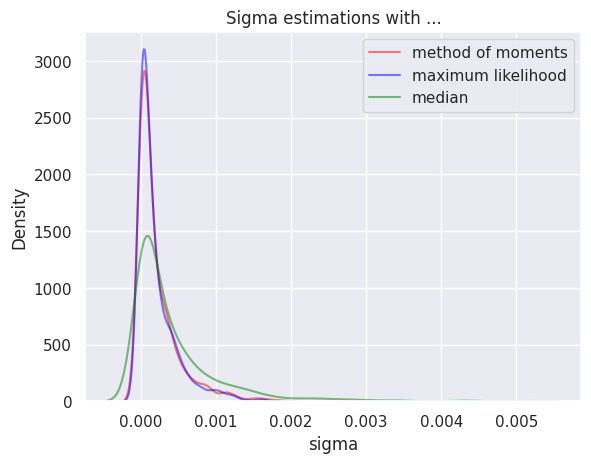

In [ ]:
sns.kdeplot(np.square(sigma_mm - sigma_true), label="method of moments", color="red", alpha=0.5)
sns.kdeplot(np.square(sigma_ml - sigma_true), label="maximum likelihood", color="blue", alpha=0.5)
sns.kdeplot(np.square(sigma_m - sigma_true), label="median", color="green", alpha=0.5)
plt.title('Sigma estimations with ...')
plt.xlabel('sigma')
plt.legend()
plt.show()

Вывод:

Численный подсчет интегралов дает очень большую погрешность, что особенно хорошо выдно в последнем, где небольшая разница в подсчитанных значениях интегралов, которые должны частично сократиться друг с другом, приводит к большой ошибке итогого значения.

В остальном

Эмпирический риск оказался ниже теоретического, что вполне ожидаемо, также изначальные гипотезы о оценках подтвердились и порядок их качественности остается неизменным с прошлого вывода, что хорошо видно и на новых графиках.

Исходя из графиков, можно ли делать выводы о состоятельности и асимптотической нормальности оценок? Будут ли оценки состоятельными и асимптотически нормальными в теории? Сошлитесь на соответствующие теоремы и предложите теоретические выкладки ниже.

Ответ:

По графикам - скорее нет, чем да, однако форма напоминает нормальные распределения, что является неплохим знаком для асимптотической нормальности. Тем не менее, для подобных выводов нужна динамика графиков при увеличении размера выборки, чего в данном построении нет.

Решение:

Ниже применены теоремы о наследовании сходимости, теоремы о наследовании асимптотической нормальности, теорема о асимптотичесской нормальности выборочной медианы, УЗБЧ, также при вычислении оценок в течение курса использовалась ЦПТ, результатами чего я здесь ненапрямую пользуюсь.

Для асимптотической нормальности достаточно асимптотической нормалности $\overline{X^2}, \overline{X}, \hat\mu$, так что все три относительно нормальны.

Соответствующие аргументы нормального распределения будут (по построению оценок из известных нам по курсу статистики):

Зам. для Релейя $M_k = \Gamma(1 + \frac{k}{2})(2\sigma^2)^{\frac{k}{2}}$

1. $\overline{X^2}$ --- $(M_2, \frac{M_4 - M_2^2}{n})$
2. $\sqrt{\frac{\overline{X^2}}{2}}$ --- $(\sigma, \frac{\sigma^2}{4n})$
3. $\overline{X}$ --- $(\sqrt{\frac{\pi}{2}}\sigma, \frac{(2 - \frac{\pi}{2})\sigma^2}{n})$
4. $\sqrt{\frac{2}{\pi}}\overline{X}$ --- $(\sigma, \frac{(\frac{4}{\pi} - 1)\sigma^2}{n})$
5. $\hat\mu$ --- $(\sigma\sqrt{2ln(2)}, \frac{1}{4n\rho^2(\sigma\sqrt{2ln(2)})})$, этот квадрат плотности равен $\frac{ln(2)}{2\sigma^2}$
6. $\frac{\hat\mu}{\sqrt{2ln(2)}}$ --- $(\sigma, \frac{\sigma^2}{4(ln(2))^2n})$

Сравните три оценки в равномерном и асимптотическом подходе. Сделайте вывод о качестве оценок.

Решение:

Для сравнения в равномерном подходе надо точно знать аналитические значения функции риска. Этого у нас нет. Однако, если бы они были упорядочены, то по полученным ранее данным мы получили бы следующее - МП > ММ > М

Что касается асимптотического подхода - надо рассмотреть константы при старшем члене в асимптотических дисперсиях:

1. $\frac{4}{\pi} - 1 \approx 0.27$

2. $\frac{1}{4} \approx 0.25$

3. $\frac{1}{4(ln(2))^2} \approx 0.52$

Порядок тот же

**Вывод:**

Как и уже было сказанно раньше, а после потвердилось теорией - лидирует МП, затем с небольшим отставанием ММ, ну и в самом хвосте находится оценка медианой.

## Задача 2. Моделирование (10 баллов)




Сформулируйте и запишите ниже Центральную Предельную теорему и Усиленный Закон Больших Чисел. Не забудьте про условия теорем!

Ответ:

$S_n := \xi_1 + ... + \xi_n$

Т. (ЦПТ) Пусть $\{\xi_n\}_{n=1}^{\infty }$ - н.о.р.с.в., и существуют и конечны $E\xi_1$ и $D\xi _1$. Тогда $\sqrt{n}\left(\frac{S_n}{n} - E\xi_1\right)\xrightarrow{d} N( 0,D\xi_1)$.

Т. (УЗБЧ) Пусть $\{\xi _n\}_{n=1}^{\infty }$ -- н.о.р.с.в., и существует и конечно $E\xi_1$. Тогда $\frac{S_n}{n}\xrightarrow{a.s.} E\xi_1$.

Численно проверьте верность теорем выше. Для доказательства того, что распределение является нормальным (в ЦПТ) используйте QQ-plot и гистограмму.

На 10 баллов необходимо показать, что теоремы верны, когда верны их условия и могут нарушаться для случайных величин, для которых условия теорем не верны. Приведите хотя бы по одному примеру величин, для которых ЦПТ и УЗБЧ не выполняются, покажите какие условия теоремы не верны и моделированием покажите, что теорема не выполняется.

Решение:

Нетрудно заметить, что

Условиям данных теорем в формулировках, данных на курсе теории вероятностей, а позже - математической статистики, не удовлетворяют случайные величины $\{\xi_n\}_{n=1}^{\infty }$, заданные как $\xi_i$ ~ Be(0.5) "+ 1" (то есть распределение бернулли со сдвигом вправо на 1) при $i=1$ и $\xi_i$ ~ Be(0.5) при $i>1$, так как они не являются н.о.р.с.в. То есть иными словами теорема не будет выполняться, т.к. они не одинакого распределены. Данный пример является по отдельности примером и для ЦПТ, и для УЗБЧ, то есть приводится как два одинаковых примера, по одному для каждой теоремы.

Матожидание и дисперсия распределений бернулли посчитаны по известным формулам и равны p и p(1-p) соответственно.

План:

1. Построить функцию, вычисляющую случайную величину из левой части итогового выражения для каждой из теорем
2. Построить функцию, генирирующую выборку заданного размера отдельно для случаев выполнения и невыполнения условий соответствующих теорем
3. Смоделировать соответствующий эксперимент для N = 100 для обеих теорем
4. Применить функцию, вычисляющие левые части для каждой из выборок и усреднить
5. Построить требуемые графики, демонстрирующие выполнение и невыполнение каждой из двух теорем для соответствующих наборов с.в.

Код:

In [ ]:
import math

In [ ]:
def CLT_left_part_calculation(values, expected_value, variance):
  return (math.sqrt(np.shape(values)[1])) * (np.average(values, axis=1) - expected_value) / math.sqrt(variance) # within each sample

def CLT_application_to_data(values, expected_value, variance):
  return np.average(np.array([CLT_left_part_calculation(np.array([subarray[:i + 1] for subarray in values]), expected_value, variance) for i in range(values.size)]), axis=0) # across samples

In [ ]:
def LLN_left_part_calculation(values):
  return np.average(values, axis=1) # within each sample

def LLN_application_to_data(values):
  return np.average(np.array([LLN_left_part_calculation(np.array([subarray[:i + 1] for subarray in values])) for i in range(values.size)]), axis=0) # across samples

In [ ]:
def bernoulli_random_variable_sequence(N):
  return np.array([np.random.binomial(1, 0.5, N) for i in range(N)])

In [ ]:
def custom_random_variable_sequence(N):
  ans = np.array([np.random.binomial(1, 0.5, N) for i in range(N)])
  ans[0] = ans[0] + 1
  return ans

In [ ]:
N = 100
bernoulli_values = bernoulli_random_variable_sequence(N)
custom_values = custom_random_variable_sequence(N)

In [ ]:
bernoulli_CLT_data = CLT_application_to_data(bernoulli_values, 0.5, 0.25)
custom_CLT_data = CLT_application_to_data(custom_values, 1.5, 0.25)

In [ ]:
bernoulli_LLN_data = LLN_application_to_data(bernoulli_values)
custom_LLN_data = LLN_application_to_data(custom_values)

Построение графиков:

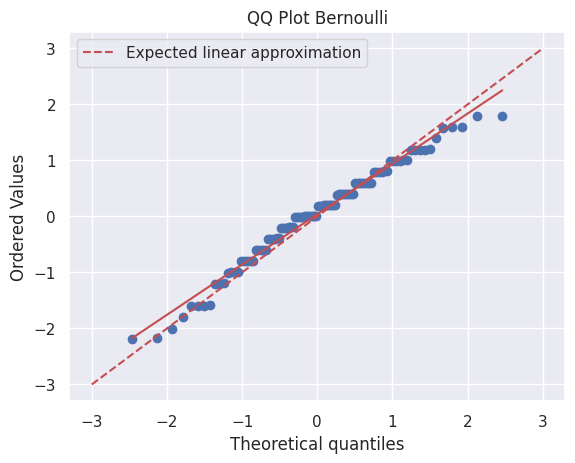

In [ ]:
sps.probplot(bernoulli_CLT_data, dist="norm", plot=plt)
plt.title('QQ Plot Bernoulli')
plt.plot([-3, 3], [-3, 3], color='r', linestyle='dashed', label='Expected linear approximation')
plt.legend()
plt.show()

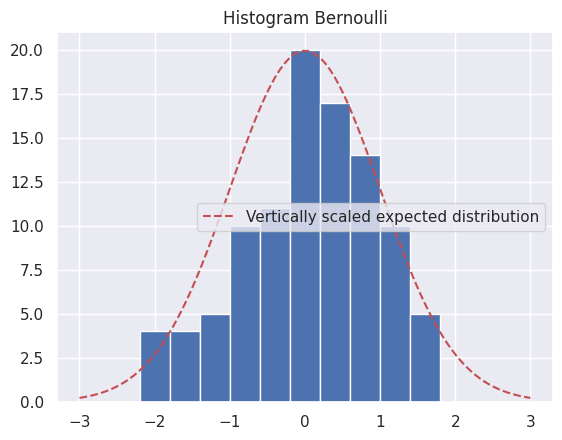

In [ ]:
plt.hist(bernoulli_CLT_data)
plt.title('Histogram Bernoulli')
x = np.linspace(-3, 3, N)
y = sps.norm.pdf(x, loc=0, scale=1) * 50
plt.plot(x, y, color='r', linestyle='dashed', label='Vertically scaled expected distribution')
plt.legend()
plt.show()

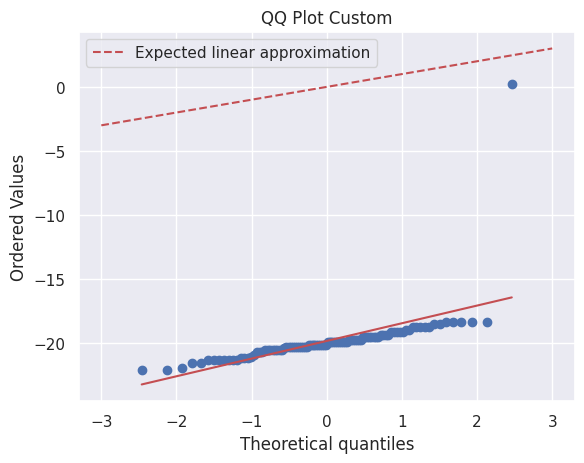

In [ ]:
sps.probplot(custom_CLT_data, dist="norm", plot=plt)
plt.title('QQ Plot Custom')
plt.plot([-3, 3], [-3, 3], color='r', linestyle='dashed', label='Expected linear approximation')
plt.legend()
plt.show()

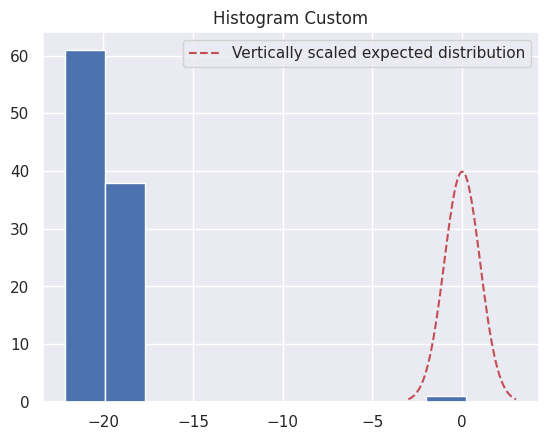

In [ ]:
plt.hist(custom_CLT_data)
plt.title('Histogram Custom')
x = np.linspace(-3, 3, N)
y = sps.norm.pdf(x, loc=0, scale=1) * 100
plt.plot(x, y, color='r', linestyle='dashed', label='Vertically scaled expected distribution')
plt.legend()
plt.show()

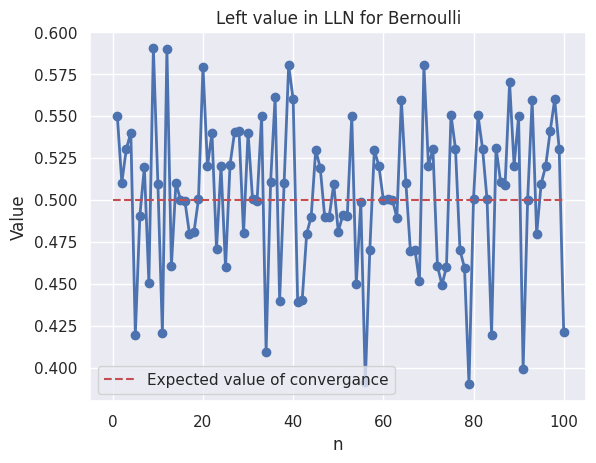

In [ ]:
plt.plot(np.arange(1, N+1, 1), bernoulli_LLN_data, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [0.5, 0.5], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('Value')
plt.title('Left value in LLN for Bernoulli')
plt.show()

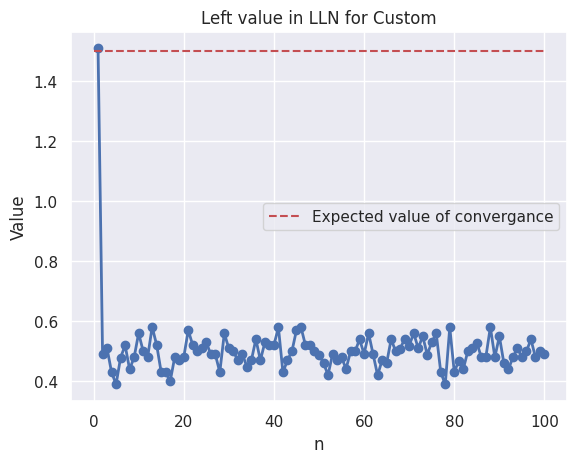

In [ ]:
plt.plot(np.arange(1, N+1, 1), custom_LLN_data, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [1.5, 1.5], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('Value')
plt.title('Left value in LLN for Custom')
plt.show()

Вывод:

Нетрудно заметить, что хоть на распределении бернулли, для которого условия теорем выполнены, результаты не идеальны, в силу его волатильности, графики тем не менее выглядят вполне правдоподобно.

В графиках для LLC есть некоторый шум, который стихает только при очень больших N  и к сожалению у моего компа не хватает мощности, чтобы считать для N на порядки больших, чем 100, но шум в пределах нормы и не мешает видеть общую тенденцию.

Для нашего же специально модифицированного распределения, с невыполненым первым условием на одинаковую распределенность, вполне очевидно, обе теоремы попросту неверны, что очень хорошо видно на графиках.

## Задача 3. Метод моментов (10 баллов)


Постройте оценку методом моментов для следующих распределений: Beta($\alpha, \beta$), Poiss($\lambda$), Bin(n, p) --- бета распределения, распределения Пуассона и биномиального распределения.

Решение:

Построение для распределения Beta($\alpha, \beta$):

Запишем первый и второй моменты: $x := E_\theta X_1 = \frac{\alpha}{\alpha + \beta}$

$y := E_\theta X_1^2 = D_\theta X_1 + (E_\theta X_1)^2 = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} + \frac{\alpha^2}{(\alpha + \beta)^2} = \frac{\alpha^3 + \alpha^2 \beta + \alpha^2 + \alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} = \frac{\alpha (\alpha + 1)}{(\alpha + \beta)(\alpha + \beta + 1)}$

Выразим $\alpha$ и $\beta$ через x и y:

$\frac{x}{y} = \frac{\alpha + \beta + 1}{\alpha + 1} = 1 + \frac{\beta}{\alpha + 1}$

$\frac{\beta}{\alpha + 1} = \frac{x}{y} - 1$

$\frac{\alpha}{\beta} + \frac{1}{\beta} = \frac{y}{x - y}$

$\frac{1}{x} = \frac{\alpha + \beta}{\alpha} = 1 + \frac{\beta}{\alpha}$

$\frac{\alpha}{\beta} = \frac{x}{1 - x}$

$\frac{1}{\beta} = \frac{y}{x - y} - \frac{x}{1 - x}$

$\beta = \frac{(x - y)(1 - x)}{y - x^2}$

$\alpha = \frac{x(x - y)}{y - x^2}$

Значит по методу моментов $\hat{\alpha} = \frac{\overline{X} (\overline{X} - \overline{X^2})}{\overline{X^2} - \overline{X}^2}$ и $\hat{\beta} = \frac{(1 - \overline{X}) (\overline{X} - \overline{X^2})}{\overline{X^2} - \overline{X}^2}$

Построение для распределения Poiss($\lambda$):

$E_\lambda(X) = \lambda$, значит по методу моментов $\hat{\lambda} = \overline{X}$

Построение для распределения Bin(n, p):

Запишем первый и второй моменты: $x := E_\theta X_1 = np$

$y := E_\theta X_1^2 = D_\theta X_1 + (E_\theta X_1)^2 = np(1 - p) + n^2p^2 = np(1 - p + np)$

Выразим p и n через x и y:

$\frac{y}{x} = 1 - p + np$

$\frac{x^2 + x - y}{x} = 1 - \frac{y}{x} + x = p$

$\frac{x^2}{x^2 + x - y} =\frac{np}{p} = n$

Значит по методу моментов $\hat{n} = \frac{\overline{X}^2}{\overline{X}^2 + \overline{X} - \overline{X^2}}$ и $\hat{p} = \frac{\overline{X}^2 + \overline{X} - \overline{X^2}}{\overline{X}}$

Постройте график сходимости оценок (по одной выборке). Проанализируйте его скорость сходимости.

План:

1. Построить функции нахождения соответствующих оценок по данной выборке

2. Смоделировать одну выборку (согласно заданию) и посчитать оценки на каждом префиксе для каждого из распределений

3. Построить графики в обычной шкале и, при необходимости/целесообразности, логарифмической (для анализа характера скорости сходимости)

Код:

In [ ]:
import random

In [ ]:
def alpha_approximation(values):
  x = np.average(values)
  y = np.average(np.square(values))
  return (x * (x - y))/(y - (x ** 2))

In [ ]:
def beta_approximation(values):
  x = np.average(values)
  y = np.average(np.square(values))
  return ((1 - x) * (x - y))/(y - (x ** 2))

In [ ]:
def lambda_approximation(values):
  return np.average(values)

In [ ]:
def n_approximation(values):
  x = np.average(values)
  y = np.average(np.square(values))
  return (x ** 2)/((x ** 2) + x - y)

In [ ]:
def p_approximation(values):
  x = np.average(values)
  y = np.average(np.square(values))
  return ((x ** 2) + x - y)/x

In [ ]:
import random

alpha_true = (1 / random.random()) - 1
beta_true = (1 / random.random()) - 1
lambda_true = (1 / random.random()) - 1
n_true = random.randint(1, 100)
p_true = random.random()

In [ ]:
N = 1000

beta_values = np.random.beta(alpha_true, beta_true, size=N)
poiss_values = np.random.poisson(lam=lambda_true, size=N)
bin_values = np.random.binomial(n=n_true, p=p_true, size=N)

*Берем минимум два элемента, чтобы избежать деления на ноль*:

In [ ]:
alpha_estimated = np.array([alpha_approximation(beta_values[:i + 2]) for i in range(N - 1)])
beta_estimated = np.array([beta_approximation(beta_values[:i + 2]) for i in range(N - 1)])
lambda_estimated = np.array([lambda_approximation(poiss_values[:i + 2]) for i in range(N - 1)])
n_estimated = np.array([n_approximation(bin_values[:i + 2]) for i in range(N - 1)])
p_estimated = np.array([p_approximation(bin_values[:i + 2]) for i in range(N - 1)])

Графики:

Обычные графики

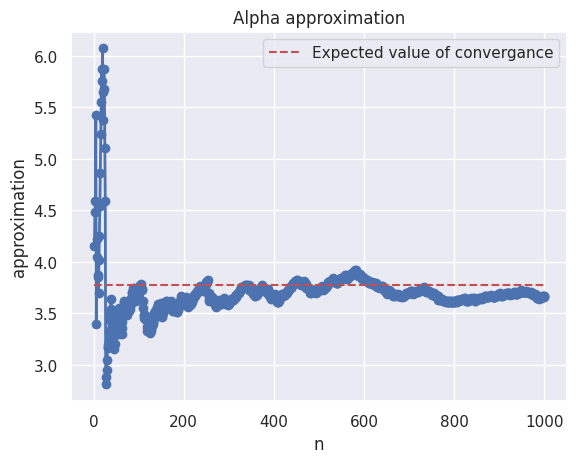

In [ ]:
plt.plot(np.arange(2, N+1, 1), alpha_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [alpha_true, alpha_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.title('Alpha approximation')
plt.show()

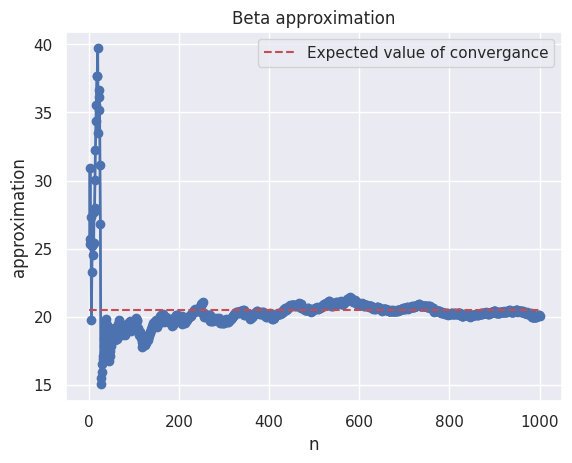

In [ ]:
plt.plot(np.arange(2, N+1, 1), beta_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [beta_true, beta_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.title('Beta approximation')
plt.show()

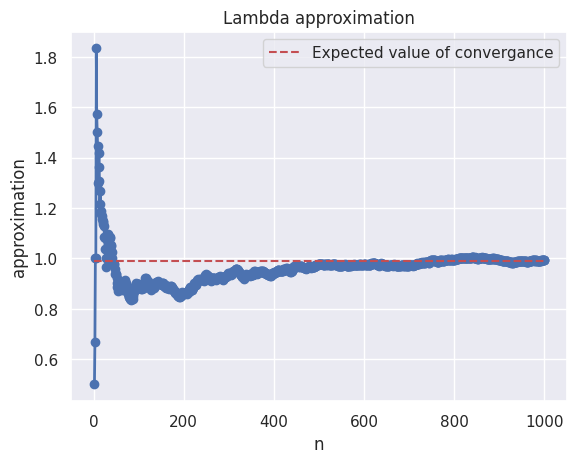

In [ ]:
plt.plot(np.arange(2, N+1, 1), lambda_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [lambda_true, lambda_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.title('Lambda approximation')
plt.show()

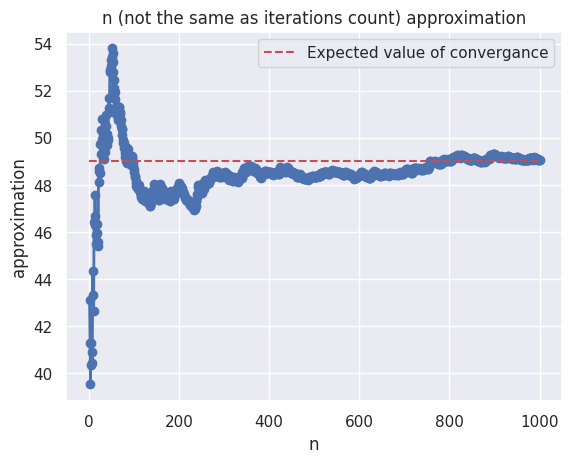

In [ ]:
plt.plot(np.arange(2, N+1, 1), n_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [n_true, n_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.title('n (not the same as iterations count) approximation')
plt.show()

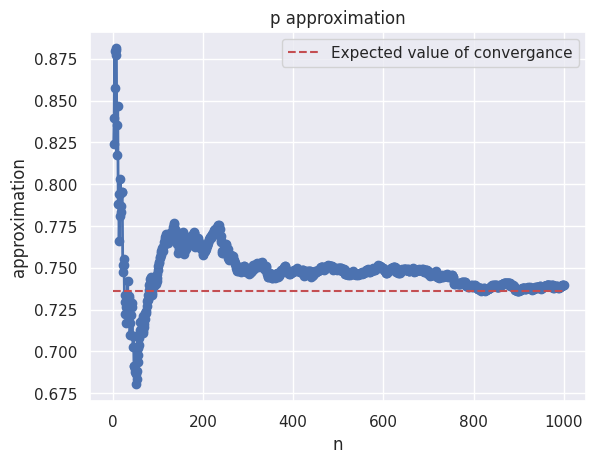

In [ ]:
plt.plot(np.arange(2, N+1, 1), p_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [p_true, p_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.title('p approximation')
plt.show()

Логарифмические графики

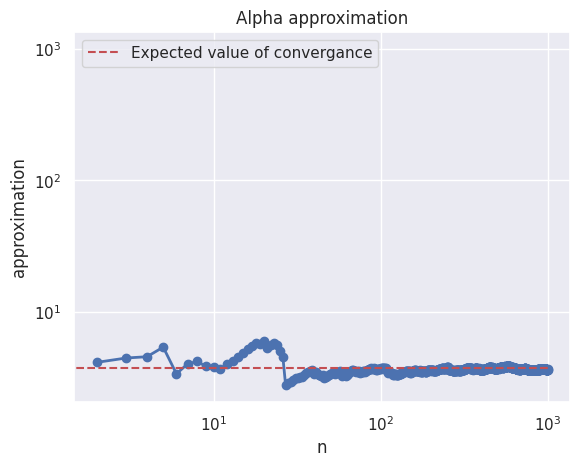

In [ ]:
plt.plot(np.arange(2, N+1, 1), alpha_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [alpha_true, alpha_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.yscale('log')
plt.xscale('log')
plt.plot(0,0)
plt.plot(1000,1000)
plt.title('Alpha approximation')
plt.show()

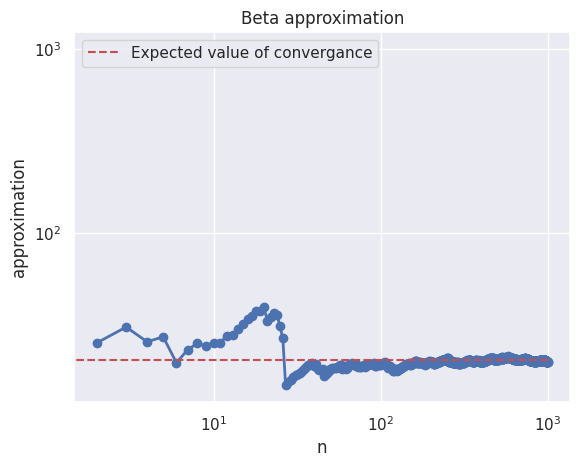

In [ ]:
plt.plot(np.arange(2, N+1, 1), beta_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [beta_true, beta_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.yscale('log')
plt.xscale('log')
plt.plot(0,0)
plt.plot(1000,1000)
plt.title('Beta approximation')
plt.show()

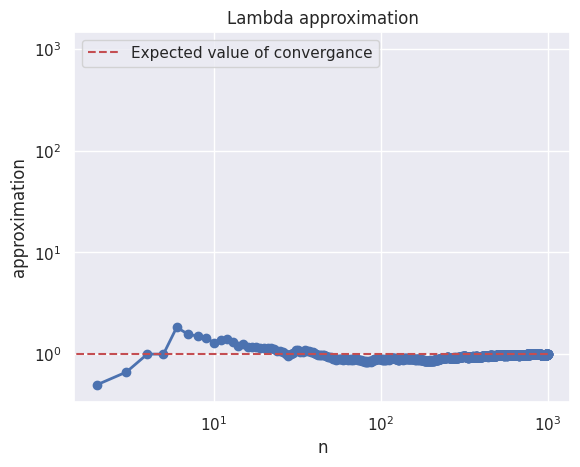

In [ ]:
plt.plot(np.arange(2, N+1, 1), lambda_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [lambda_true, lambda_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.yscale('log')
plt.xscale('log')
plt.plot(0,0)
plt.plot(1000,1000)
plt.title('Lambda approximation')
plt.show()

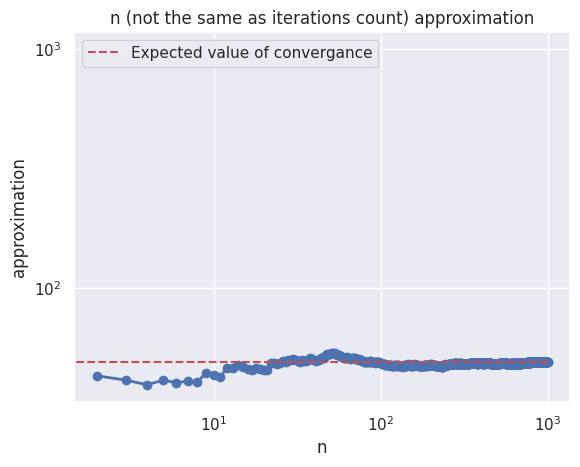

In [ ]:
plt.plot(np.arange(2, N+1, 1), n_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [n_true, n_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.yscale('log')
plt.xscale('log')
plt.plot(0,0)
plt.plot(1000,1000)
plt.title('n (not the same as iterations count) approximation')
plt.show()

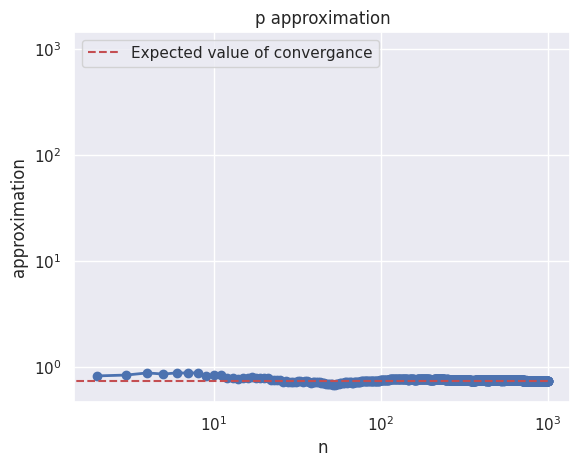

In [ ]:
plt.plot(np.arange(2, N+1, 1), p_estimated, marker='o', color='b', linestyle='-', linewidth=2)
plt.plot([0, N], [p_true, p_true], color='r', linestyle='dashed', label='Expected value of convergance')
plt.legend()
plt.xlabel('n')
plt.ylabel('approximation')
plt.yscale('log')
plt.xscale('log')
plt.plot(0,0)
plt.plot(1000,1000)
plt.title('p approximation')
plt.show()

Графики выходят шумными, однако если пытаться оценить первичный наклон на логарифмической шкале целым числом, на всех графиках сразу, он выглядит довольно близким к -1, что означает, что величина ошибки в нашем эксперименте очень приблизительно ведет себя похоже на 1/n с некоторым коэффициентом (возможно колебание степени в некоторых пределах).

Будут ли оценки состоятельными? Напишите соответствующую теорию.

Теория:

Обозначим $m_i( \theta ) =E_\theta g_i( X_1)$, а m - соотв. вектор-функция

Т. (сильная состоятельности оценки по методу моментов) Пусть $ m:\Theta \rightarrow m( \Theta )$ - биекция, и функцию $m^{-1}$ можно доопределить до функции, заданной на всем $\mathbb{R}^k$, и непрерывной в каждой точке множества $m( \Theta )$. Также, $E_\theta g_i( X_1) < \infty \ \forall i:1\leqslant i\leqslant k,\ \forall \theta \in \Theta $. Тогда оценка по методу моментов является сильно состоятельной оценкой параметра $\theta $

Ответ:

Полученные нами оценки удовлетвояют данному требованию, т.е. будут не просто состоятельными, но и сильно состоятельными.

Обоснуйте теоретически, какие скорости сходимости оценок следовало ожидать в этой задаче.

Для метода моментов нет единой скорости сходимости, однако для асимптотически-нормальных оценок, по теореме (ниже) таковыми являются и оценки полученные нами, известно скорость оценивается примерно как $\frac{\sigma(\theta)}{\sqrt{n}}$, однако на деле скорость сходисмости выглядит несколько выше, что может быть обусловлено шумом, а может реальной разницой в характере сходимости.

Т. (асимптотическая нормальность оценки по методу моментов) Если в условиях предыдущей теоремы функция $m^{-1}$, доопределенная на $\mathbb{R}^k$, дифференцируема на $m( \Theta )$, и $E_\theta g_i^2( X_1) < \infty \ \forall i:1\leqslant i\leqslant k$, то оценка, полученная по методу моментов, асимптотически нормальна.

Сделайте вывод.

**Вывод:**

Метод моментов дает быстрые и качественные оценки параметров на данных примерах и является удобным для вычисления. В большом числе практических случаев он также дает оценки с достаточно хорошими свойствами. Однако в данном конкретном эксперименте конкретные прикидки эффективности вышли не очень точными из-за шумов при случайной генерации, что является нормальным для данной постановки эксперимента.

## Задача 4. Байесовские оценки (10 баллов)


Для распределения Пуассона и экспоненциального распределения постройте сопряжённое семейство распределений и выведите, как изменяются его параметры после вариационного байесовского вывода (после применения теоремы Байеса):

Просим решить задачу для одного распределения, и только затем для второго, чтобы упростить проверку. Не стройте в одной ячейке объекты, относящиеся к разным распределениям!

Решение:

Т. (Байеса) $\rho(\theta | X) = \frac{\rho(X | \theta) \rho(\theta)}{\rho(X)}$

Распределение Пуассона:

$\rho(X|\lambda) = \Pi_{i=1}^n\frac{\lambda^{X_i}e^{-\lambda}}{X_i!} = \frac{e^{-n\lambda}\lambda^{\Sigma_{i=1}^nX_i}}{\Pi_{i=1}^nX_i!}$

Возьмем $\lambda \sim Gamma(\alpha, \beta)$

$\rho(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}$

$\rho(\lambda|X) \propto \rho(X|\lambda)\rho(\lambda) \propto \lambda^{\Sigma_{i=1}^nX_i}\lambda^{\alpha-1}e^{-(\beta + n)\lambda} \propto \rho(\xi)$, где $\xi \sim Gamma(\alpha + \Sigma_{i=1}^nX_i, \beta + n)$

То $Gamma(\alpha, \beta)$ - сопряженное $Pois(\lambda)$ семейство распределений, изменение параметров видно выше.

Экспоненциальное распределение:

$\rho(X|\lambda) = \Pi_{i=1}^n\lambda e^{-\lambda X_i} = \lambda^ne^{\lambda\Sigma_{i=1}^nX_i}$

Возьмем $\lambda \sim Gamma(\alpha, \beta)$

$\rho(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}$

$\rho(\lambda|X) \propto \rho(X|\lambda)\rho(\lambda) \propto \lambda^{\alpha + n}e^{\beta + \Sigma_{i=1}^nX_i} \propto \rho(\xi)$, где $\xi \sim Gamma(\alpha + n, \beta + \Sigma_{i=1}^nX_i)$

То $Gamma(\alpha, \beta)$ - сопряженное $Exp(\lambda)$ семейство распределений, изменение параметров видно выше.

Постройте апостериорные плотности для разных выборов априорных параметров (для обоих распределений):

План:
1. Написать функции вычисления для априорных и апостериорных $\rho$ на заданных входных параметрах (pdf$(\theta)$ для $Gamma(\alpha, \beta)$)
2. Сгенерировать выборки из соотв. распределений для N = 2 (чтобы не считать большие гамма-функции, просто потому что графики иначе не информативные)
3. Построить графики показывающие связь априорной и постериорной плотности для разных выборов распределений и их параметров

Код:

In [ ]:
import math
import random

In [ ]:
def gamma(alpha, beta, theta):
  return ((beta**alpha)/(math.gamma(alpha)))*(theta**(alpha - 1))*(math.e**(-(beta * theta)))

In [ ]:
lambda_true = (1 / random.random()) - 1

In [ ]:
N = 2
poisson_values = np.random.poisson(lam=lambda_true, size=N)
exponential_values = np.random.exponential(scale=lambda_true, size=N)
poisson_sum = np.sum(poisson_values)
exponential_sum = np.sum(exponential_values)

Графики:

In [ ]:
upper_bound = 10
x = np.linspace(0, upper_bound, upper_bound*10)

Распределение Пуассона:

In [ ]:
def poisson_plot(alpha, beta):
  y = np.array([gamma(alpha, beta, i) for i in x])
  plt.plot(x, y, label="prior")
  y = np.array([gamma(alpha + poisson_sum, beta + N, i) for i in x])
  plt.plot(x, y, label="posterior")
  plt.xlabel("lambda")
  plt.ylabel("density")
  plt.legend()
  plt.title("Plot for ({:d}, {:d})".format(alpha, beta))
  plt.show()

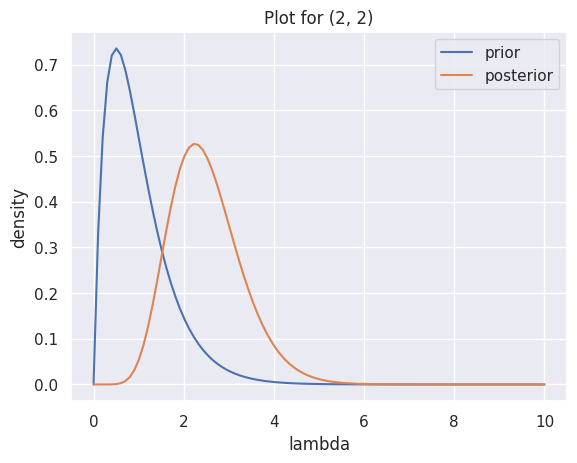

In [ ]:
poisson_plot(2,2)

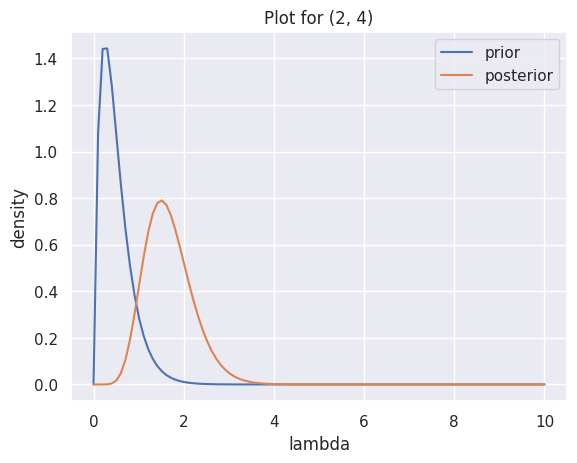

In [ ]:
poisson_plot(2, 4)

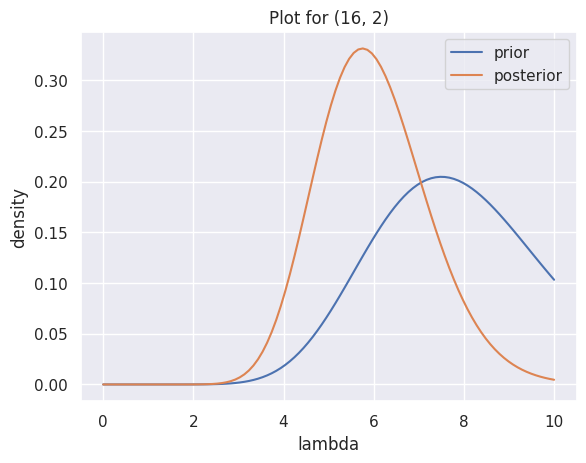

In [ ]:
poisson_plot(16,2)

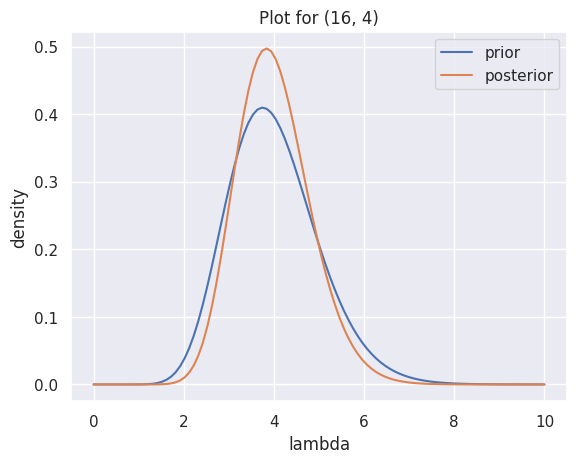

In [ ]:
poisson_plot(16,4)

Экспоненциальное распределение:

In [ ]:
def exponential_plot(alpha, beta):
  y = np.array([gamma(alpha, beta, i) for i in x])
  plt.plot(x, y, label="prior")
  y = np.array([gamma(alpha + N, beta + exponential_sum, i) for i in x])
  plt.plot(x, y, label="posterior")
  plt.xlabel("lambda")
  plt.ylabel("density")
  plt.legend()
  plt.title("Plot for ({:d}, {:d})".format(alpha, beta))
  plt.show()

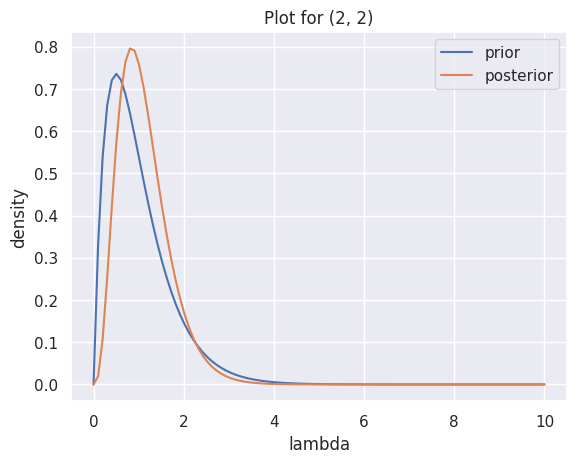

In [ ]:
exponential_plot(2, 2)

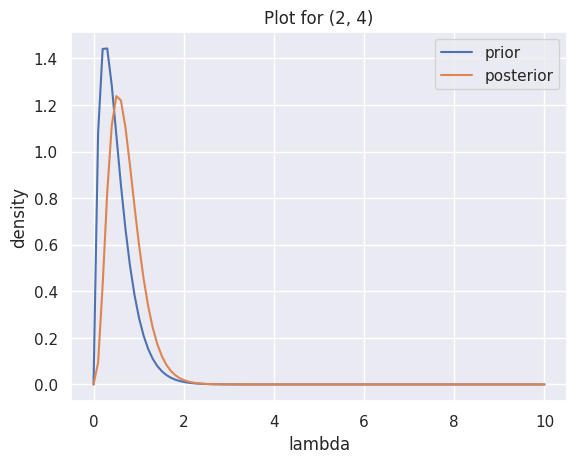

In [ ]:
exponential_plot(2, 4)

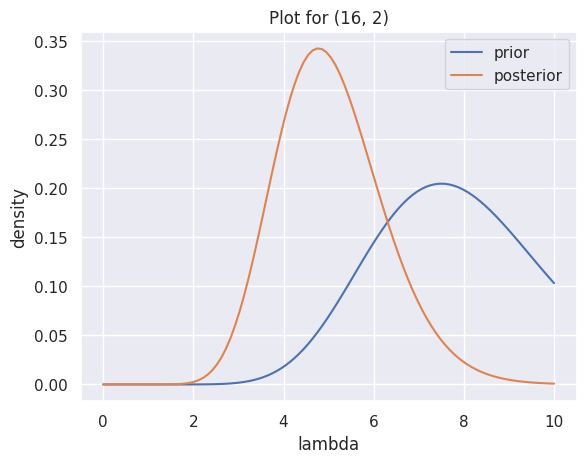

In [ ]:
exponential_plot(16, 2)

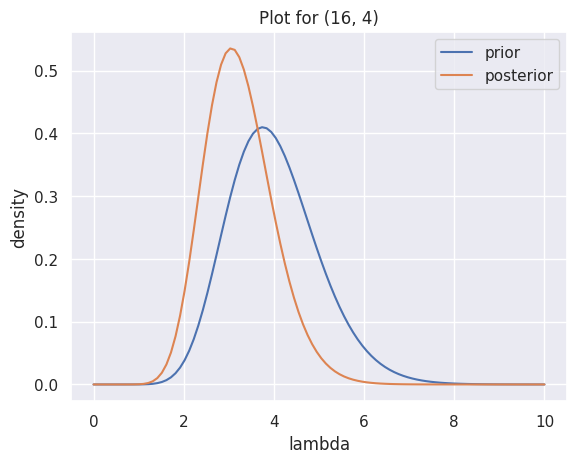

In [ ]:
exponential_plot(16, 4)

Сделайте вывод о том, как выбор априорных параметров влияет на апостериорную плотность и как его следует подбирать на практике.

**Вывод:**

В каждом конкретном случае априорные и постериорные параметры отличаются на фиксированную константу каждый. Это значит что изменение плотности распределения при изменении параметра предсказуемо. В некотором смысле априорный и постериорный график похожи, например при смещении пика одного из них вправо пик другого смещается туда же. Для подбора на практике я бы сначала попробовал применить обычные методы оптимизации, в качестве функции награды/потерь (в зависимости от постановки) можно взять, например, ковариацию распределений (награда), но вообще это зависит от постановки задачи и имеющихся данных.

## Задача 5. Доверительное оценивание. (10 баллов)


Для распределения Лапласа с плотностью $p_{a}(x) = \frac{1}{4}exp(-\frac{|x - a|}{2})$ постройте точный и асимптотический доверительные интервалы. Второй нужно строить на основании ЦПТ.

Решение:

Точный для N = 1:

Запишем CDF:

При $x > a$

$F = 1 - \frac{1}{2}e^{\frac{x - a}{2}}$

При $x < a$

$F = \frac{1}{2}e^{\frac{x - a}{2}}$

И $\frac{1}{2}$ иначе

Нетрудно заметить что это действительно CDF простым взятием производной

Построение ppf:

$P(\alpha) = F^{-1}(\alpha) = arginf_{x \in \mathbb{R}}(F(x) > \alpha)$

$\alpha = \frac{1}{2}$, то $x = a$

$\alpha > \frac{1}{2}$, то $x < 2ln(2 - 2\alpha) + a$

$\alpha < \frac{1}{2}$, то $x > a - 2ln(2\alpha)$

Асимптотический:

Дисперсия для распределения лапласа с b = 2 равна 8, то по формуле асимптотического доверительного интервала

$|x - a| < 2C\sqrt{\frac{2}{n}}$, где C - соотв. константа для нормального распределения, полученная из ЦПТ

Напишите функции вычисления точного, асимптотического и бутстрепного интервала.

Пишем в соответствии с теорией

In [ ]:
def ppf(alpha):
  if (alpha == 0.5):
    return a
  elif (alpha < 0.5):
    return math.log(2*alpha)
  else:
    return -math.log(2 - 2*alpha)

In [ ]:
def precise_interval(alpha, a, N):
  margin = 2 * ppf(1 - alpha * 0.01) * math.sqrt(1/N)
  return[a - margin, a + margin]


def asymptotic_interval(alpha, a, N):
  margin = 2 * sps.norm.ppf(1 - alpha * 0.01) * math.sqrt(2/N)
  return[a - margin, a + margin]


def bootstrap_interval(alpha, a, N):
  bootstrap_values = np.array([np.random.laplace(a, 2, N) for i in range(N)])
  return [np.percentile(np.average(bootstrap_values, axis=1), alpha/2), np.percentile(np.average(bootstrap_values, axis=1), 100 - (alpha/2))]

На графике в осях (размер выборки, параметр) отрисуйте поведение
 асимптотического, точного и бутстрепного доверительных интервалов уровня доверия 95% (рисуйте интервал как два графика верхней и нижней границы интервала + fill_between между ними). Выставьте прозрачность так, чтобы визуально интервалы были различимы. Размеры выборки выберите так, чтобы график получился информативным (интервалы не схлопнулись быстро).

Строим график на оси x - параметр, на y - выбранный регион

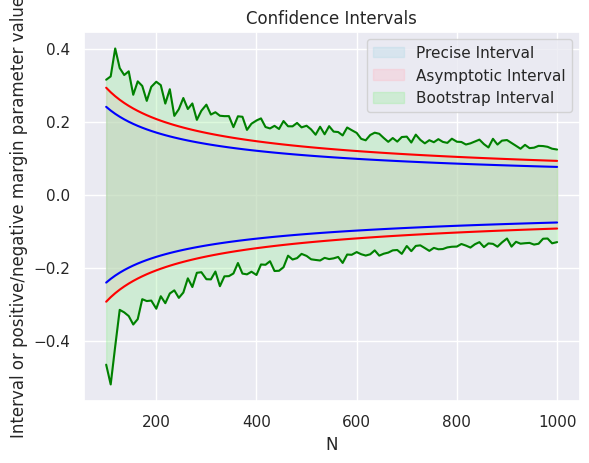

In [ ]:
x = np.linspace(100, 1000, 100, dtype=int) #sample size

a = 0

alpha = 15

lower_bounds = []
upper_bounds = []
for N in x:
    [lower, upper] = precise_interval(alpha, a, N)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

plt.fill_between(x, lower_bounds, upper_bounds, color='lightblue', alpha=0.3, label='Precise Interval')
plt.plot(x, lower_bounds, color='blue')
plt.plot(x, upper_bounds, color='blue')

lower_bounds = []
upper_bounds = []
for N in x:
    [lower, upper] = asymptotic_interval(alpha, a, N)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

plt.fill_between(x, lower_bounds, upper_bounds, color='lightpink', alpha=0.3, label='Asymptotic Interval')
plt.plot(x, lower_bounds, color='red')
plt.plot(x, upper_bounds, color='red')

lower_bounds = []
upper_bounds = []
for N in x:
    [lower, upper] = bootstrap_interval(alpha, a, N)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

plt.fill_between(x, lower_bounds, upper_bounds, color='lightgreen', alpha=0.3, label='Bootstrap Interval')
plt.plot(x, lower_bounds, color='green')
plt.plot(x, upper_bounds, color='green')

plt.xlabel('N')
plt.ylabel('Interval or positive/negative margin parameter value')
plt.title('Confidence Intervals')
plt.legend(loc = 'upper right')
plt.grid(True)


Моделированием по выборкам для фиксированного размера выборки (максимального из графика выше) проверьте, как часто параметр попадает в интервал.

In [ ]:
N = 1000
alpha = 5
a = 0
values = np.array([np.random.laplace(a, 2, N) for i in range(N)])
pi = precise_interval(alpha, 0, N)
ai = asymptotic_interval(alpha, 0, N)
bi = bootstrap_interval(alpha, 0, N)

pi_bool = (np.average(values, axis = 1) - a) < pi[1]
ai_bool = (np.average(values, axis = 1) - a) < ai[1]
bi_bool = (np.average(values, axis = 1) - a) < bi[1]

pi_count = np.average(pi_bool.astype(int))
ai_count = np.average(ai_bool.astype(int))
bi_count = np.average(bi_bool.astype(int))

print(pi_count, ai_count, bi_count)

0.951 0.954 0.955


Сделайте вывод о точности, размере и простоте построения каждого из трёх интервалов.

**Вывод:**

Самым точным является точный - он ближе всего к истине, проще всего вычислять бутстреп, но он менее точный, а асимптотический сложнее вычислять, но он точнее.

## Задача 6. Бутстреп (10 баллов)

Выборка в ячейке ниже представляет собой измерение во времени количество часов, необходимых чтобы решить эту задачу для 10 случайных человек с курса.

План: реализовать то что написано над ячейками, следуя теоретическим пояснениям

Код:

In [ ]:
17.68, 13.69, 11.22, 11.05, 13.86, 14.47, 14.50, 13.47, 10.04, 13.10

(17.68, 13.69, 11.22, 11.05, 13.86, 14.47, 14.5, 13.47, 10.04, 13.1)

In [ ]:
values = np.array([17.68, 13.69, 11.22, 11.05, 13.86, 14.47, 14.50, 13.47, 10.04, 13.10])

Вычислите среднее время решения задачи

Решение: считаем эмпирическое матожидание

In [ ]:
np.average(values)

13.307999999999998

Предложите способ вычисления дисперсии полученной оценки (распределение, из которого пришли данные неизвестно):

Решение: воспользуемся формулой оценки стандартного отклонения - $\hat\sigma_\overline{X} = \sqrt{\frac{1}{n(n - 1)}\Sigma_{i=1}^n(X_i - \overline{X})^2}$, и примем его за корень из дисперсии.

In [ ]:
print("estimated dispersion is ", (1 / (values.size * (values.size - 1))) * (np.sum(np.square(values - np.average(values)))))

estimated dispersion is  0.47270844444444443


Предложите доверительный интервал уровня доверия 95% на истинное время выполнения задачи:

Решение: Воспользуемся бутстрепом - для этого построим эмпирическую функцию распределения $\hat{F}$ на имеющихся данных, сгенерируем на ней N = 1000* выборок размера N, потому что генерация большего числа выборок затратна, а 1000 даст нам осмыслено строить квантили с точностью до 1000-х долей, что требуется для построения 2.5% и 97.5% квантилей, чтобы получить бутстрепный интервал доверия 95%

*однако тут стоит отметить, что при очень малом размере выборки, как у нас, имеет смысл в несколько раз увеличить N, чтобы повысить стабильность результатов и уменьшить влияние случайности, так что я возьму N = 10000, просто на всякий случай, хотя 1000 должно быть в целом достаточно

In [ ]:
N = 10000
bootstrap_values = np.array([np.random.choice(values, 5) for i in range(N)])

In [ ]:
print("the values are ", np.percentile(np.average(bootstrap_values, axis=1), 2.5), " ", np.percentile(np.average(bootstrap_values, axis=1), 97.5))

the values are  11.572   15.157999999999998


Какое число бутстрепных выборок Вы взяли? Почему?

Ответ: См. выше, а еще почему в ноутбуке разбросаны пустые ячейки для кода в местах где не требуется писать код?

Сравните доверительный интервал, который Вы построили методом бутстрепа с асимптотическим доверительным интервалом, построенным с использованием бутстрепной дисперсии. Какой вышел длиннее? Какому Вы бы больше доверились и почему?

Решение: посчитаем асимптотический доверительный интервал для полученной дисперсии (В данном случае надо брать константу C = 1.96 - она выводится из ЦПТ и соответствует уверенности )

Допустимое отклонение от среднего считается как $C\frac{\hat\sigma_\overline{X}}{\sqrt{n}}$

In [ ]:
margin = 1.96 * np.sqrt(1 / (values.size * (values.size - 1))) * (np.sum(np.square(values - np.average(values)))) / np.sqrt(values.size)

In [ ]:
print("the values are ", np.average(values) - margin, " ", np.average(values) + margin)

the values are  10.528474346666666   16.08752565333333


Сделайте вывод.

**Вывод**

Асимптотический интервал вышел длиннее, поскольку он предполагает, что природа распределения нормальная, в то время как бутстрепный интервал приближает его изнутри, но в силу малого размера выборки не точно. Я бы больше доверился ему, а если бы один интервал не полностью лежал бы в другом, то лучше объединению интервалов (различие важно при смещении центров интервалов относительно друг друга), потому что в практических задачах стоит минимизировать риски, и когда есть несколько различных оценок, так или иначе моделирующих реальность, стоит при возможности опираться на наиболее пессимистичную, чтобы быть лучше готовым к непредвиденным обстоятельствам.

## Задача 7. Линейная регрессия (20 баллов)

**Эту задачку я по дороге писал с мобилки - переписывать нормально не буду, ведь не успел до экзамена**

Поговорим о задаче полиномиального приближения. Дан обобщённый многочлен степени 5, измеренный с нормальной независимой ошибкой.

$P(x) = a_0 + a_1x + a_2x^3 + a_3sin(x) + a_4ln(x)$.

Значения многочлена измерили с ошибкой в точках $x_i = $ 1, 2, ..., 20 и обозначили измерения как $y_i$.

Запишите линейную регрессионную модель, при помощи которой можно будет оценить параметры $a_i$.

Берём w0...w4 - веса. Пишем RSS: loss = 1/20 * sum((yi - (w0 + w1xi + ... + w4ln(xi)))^2).
Берём формулу: W = (X^t * X)^(-1) * X^t * Y, где X - матрица параметров (20x5), Y - вектор ответов (20x1), W - вектор весов (5x1)
Получаем аппроксимацию ai

Выберите какие-то ненулевые параметры $a_i$, проведите измерение (добавив нормальную ошибку) и вычислите оценку параметров. Использовать встроенную регрессионную модель ЗАПРЕЩЕНО, все формулы нужно написать самому.

In [ ]:
from numpy.linalg import inv # обращение матрицы

# Пихаем что пойдет
a = np.array([1, 1, 1, 1, 1]) # ai = a[i]
mu = 0
sigma = 1
ys = []
xs = []

# Генерим точки
for i in range(1, 21):
    xstemp = [1, i, i**3, np.sin(i), np.log(i)] # Условия вектором
    xs.append(xstemp)
    ys.append(np.dot(a, xstemp) + np.random.normal(mu, sigma))

x = np.array(xs)
y = np.array(ys)
# дебаг
#print(1)
#print(xarr)
#print(yarr)

# считаем W (веса)
xt = x.transpose()
w = (inv(xt @ x) @ xt) @ y
print(w)

# Волшебный код с википедии, считающий коэффициент детерминации (тут должно выйти примерно 1, ведь гипотезы нет)
ssres = sum((np.dot(w, xs[i]) - ys[i])**2 for i in range(20))
sstot = sum((ys[i] - np.mean(ys))**2 for i in range(20))
print(ssres)
print(sstot)
r = (1 - ssres/sstot)**0.5
print(r)

[1.27352375 1.1622258  0.99986181 1.08278196 0.13041125]
6.832895743919505
119793522.53971031
0.9999999714805288


Постройте доверительные интервалы для параметров $a_i$ и вычислите их:

Решение: не успел

In [ ]:
,

Проверьте гипотезу $a_3 = 0$ о бесполезности параметра 3 при помощи F-критерия (который нужно написать самому) на уровне значимости 0.05. Отвергается ли она?

In [ ]:
from copy import deepcopy
t = deepcopy(w)
t[3] = 0
# дебаг
#print(w)
#print(t)
ssrest = sum((np.dot(t, xs[i]) - ys[i])**2 for i in range(20))
sstott = sum((ys[i] - np.mean(ys))**2 for i in range(20))
# еще дебаг
#print(ssres)
#print(sstot)
rt = (1 - ssrest/sstott)**0.5
# оценка точности
#print(rt)


# формула подсчета F-критерия с википедии
kl = 5
ks = 4
n = 20
f = (r**2 - rt**2)*(n - kl) / ((1 - r**2)*(kl - ks))
print(f)

# k1 = 5
# k2 = 14
# получилось: f ~= 26.5
# из таблицы -- критическое значение F равно 2.96. Гипотеза отвергается

26.502359365995847


Теперь положите $a_3 = 0$ и пересчитайте модель. Проверьте гипотезу из прошлого пункта снова. Отвергается ли она теперь?

In [ ]:
# То же самое
a = np.array([1, 1, 1, 0, 1]) # ai = a[i]
mu = 0
sigma = 1
ys = []
xs = []

# генерим
for i in range(1, 21):
    xstemp = [1, i, i**3, np.sin(i), np.log(i)] # X as a matrix
    xs.append(xstemp)
    ys.append(np.dot(a, xstemp) + np.random.normal(mu, sigma))

x = np.array(xs)
y = np.array(ys)
#print(1)
#print(xarr)
#print(yarr)

# считаем W
xt = x.transpose()
w = (inv(xt @ x) @ xt) @ y
#print(w)

ssres = sum((np.dot(w, xs[i]) - ys[i])**2 for i in range(20))
sstot = sum((ys[i] - np.mean(ys))**2 for i in range(20))
#print(ssres)
#print(sstot)
r = (1 - ssres/sstot)**0.5
#print(r)

t = deepcopy(w)
t[3] = 0
#print(w)
#print(t)
ssrest = sum((np.dot(t, xs[i]) - ys[i])**2 for i in range(20))
sstott = sum((ys[i] - np.mean(ys))**2 for i in range(20))
#print(ssres)
#print(sstot)
rt = (1 - ssrest/sstott)**0.5
#print(rt)

kl = 5
ks = 4
n = 20
f = (r**2 - rt**2)*(n - kl) / ((1 - r**2)*(kl - ks))
print(f)

# k1 = 5
# k2 = 14
# получилось: f ~= 0.41
# из таблицы -- критическое значение F равно 2.96. Гипотеза НЕ отвергается


0.4171805368539706


**Вывод:**

F-критерий эффективно определяет верность гипотезы при невысокой вычислительной сложности самого метода. Необходимость пользоваться табличными значениями является некоторым неудобством, но в целом метод хороший.

Желаем удачи!